In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

### In this project we're just going to explore the dataset and summarize it

The dataset is taken from - https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store

In [11]:
ecom_purchase_df = pd.read_csv('purchases.csv', parse_dates=True)

In [5]:
ecom_purchase_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [7]:
ecom_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [9]:
ecom_purchase_df.isna().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [11]:
len(ecom_purchase_df)

2633521

In [13]:
ecom_purchase_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,2633521.0,2.361783e+18,1.716538e+16,2.294360e+18,2.348807e+18,2.353254e+18,2.383131e+18,2.388441e+18
product_id,2633521.0,1.674080e+18,3.102249e+17,1.515966e+18,1.515966e+18,1.515966e+18,1.515966e+18,2.388434e+18
category_id,2201567.0,2.273827e+18,2.353247e+16,2.268105e+18,2.268105e+18,2.268105e+18,2.268105e+18,2.374499e+18
price,2201567.0,1.540932e+02,2.419421e+02,0.000000e+00,1.456000e+01,5.553000e+01,1.967400e+02,5.092590e+04
user_id,564169.0,1.515916e+18,2.379057e+07,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18


In [15]:
len(ecom_purchase_df['category_code'].unique())

511

In [17]:
ecom_purchase_df['event_time'] = pd.to_datetime(ecom_purchase_df['event_time'])

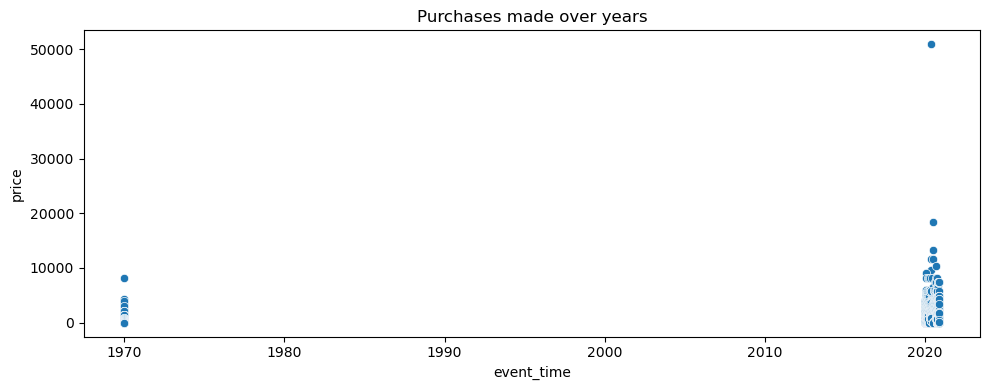

In [19]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='event_time', y='price', data=ecom_purchase_df)
plt.title('Purchases made over years')
plt.tight_layout()
plt.show()

In [49]:
ecom_purchase_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [14]:
ecom_purchase_df['month'] = ecom_purchase_df['event_time'].dt.month
ecom_purchase_df['day'] = ecom_purchase_df['event_time'].dt.day
ecom_purchase_df['year'] = ecom_purchase_df['event_time'].dt.year

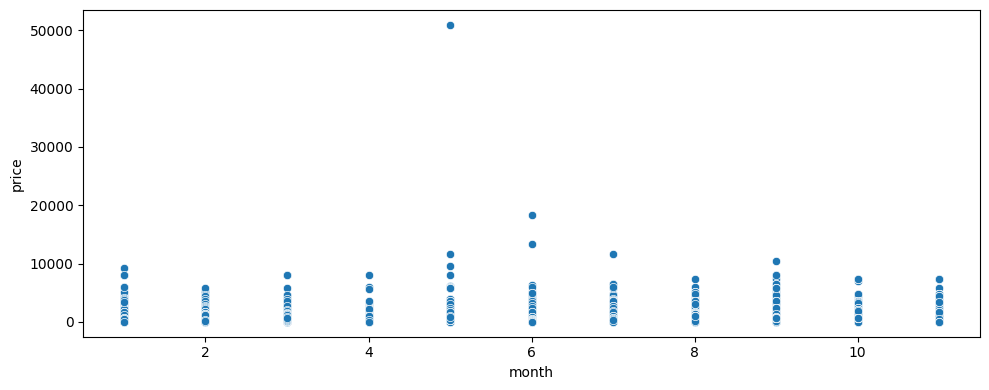

In [15]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='month', y='price', data=ecom_purchase_df)
plt.tight_layout()
plt.show()

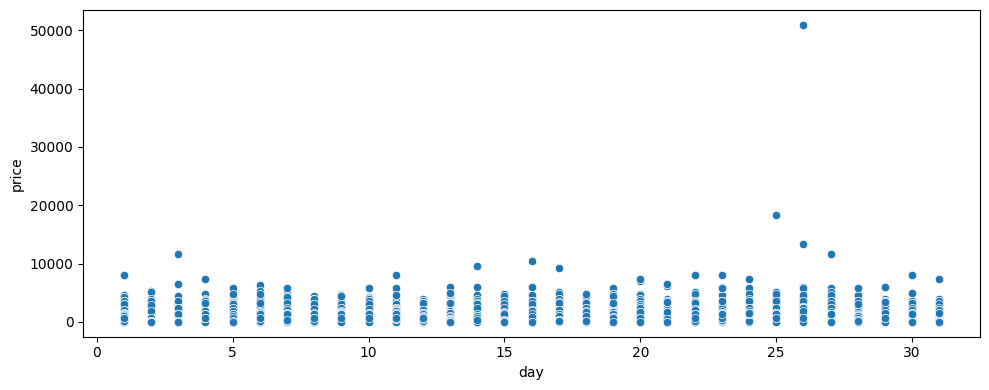

In [16]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='day', y='price', data=ecom_purchase_df)
plt.tight_layout()
plt.show()

In [17]:
ecom_purchase_df['year'].unique()

array([2020, 1970], dtype=int32)

In [18]:
ecom_purchase_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month,day,year
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,4,24,2020
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,4,24,2020
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,4,24,2020
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,4,24,2020
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,4,24,2020


In [19]:
ecom_purchase_df['category_code'].unique()

array(['electronics.tablet', 'electronics.audio.headphone', nan,
       'furniture.kitchen.table', 'electronics.smartphone',
       'appliances.kitchen.refrigerators', 'appliances.personal.scales',
       'electronics.video.tv', 'computers.components.cpu',
       'computers.notebook', 'computers.peripherals.monitor',
       'computers.peripherals.printer', 'appliances.kitchen.kettle',
       'computers.components.memory', 'electronics.clocks',
       'country_yard.weather_station', 'appliances.kitchen.blender',
       'accessories.bag', 'computers.peripherals.keyboard',
       'computers.peripherals.mouse', 'appliances.iron',
       'appliances.kitchen.mixer', 'electronics.telephone',
       'appliances.kitchen.meat_grinder',
       'appliances.personal.hair_cutter',
       'appliances.environment.air_heater', 'kids.skates',
       'appliances.kitchen.washer', 'appliances.kitchen.microwave',
       'furniture.bedroom.pillow', 'appliances.environment.vacuum',
       'appliances.environm

In [20]:
ecom_purchase_df[ecom_purchase_df['category_id'].isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month,day,year
1812,2020-05-02 11:12:20+00:00,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,5,2,2020
3633,2020-05-06 07:37:55+00:00,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,5,6,2020
3918,2020-05-06 22:36:13+00:00,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,5,6,2020
6015,2020-05-10 09:41:54+00:00,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,5,10,2020
7802,2020-05-13 03:09:39+00:00,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,5,13,2020
...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56+00:00,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,11,19,2020
2632434,2020-11-19 05:38:31+00:00,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,11,19,2020
2632437,2020-11-19 11:21:22+00:00,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,11,19,2020
2632472,2020-11-19 09:54:22+00:00,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,11,19,2020


In [21]:
ecom_purchase_df.iloc[6015]

event_time       2020-05-10 09:41:54+00:00
order_id               2305891548316827762
product_id             1515966223509353669
category_id                            NaN
category_code                         0.02
brand                  1515915625441980762
price                                  NaN
user_id                                NaN
month                                    5
day                                     10
year                                  2020
Name: 6015, dtype: object

In [22]:
numeric_rows = ecom_purchase_df[pd.to_numeric(ecom_purchase_df['category_code'], errors='coerce').notna()]

In [23]:
numeric_rows

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month,day,year
1812,2020-05-02 11:12:20+00:00,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,5,2,2020
3633,2020-05-06 07:37:55+00:00,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,5,6,2020
3918,2020-05-06 22:36:13+00:00,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,5,6,2020
6015,2020-05-10 09:41:54+00:00,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,5,10,2020
7802,2020-05-13 03:09:39+00:00,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,5,13,2020
...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56+00:00,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,11,19,2020
2632434,2020-11-19 05:38:31+00:00,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,11,19,2020
2632437,2020-11-19 11:21:22+00:00,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,11,19,2020
2632472,2020-11-19 09:54:22+00:00,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,11,19,2020


In [24]:
numeric_rows2 = ecom_purchase_df[pd.to_numeric(ecom_purchase_df['brand'], errors='coerce').notna()]

In [25]:
numeric_rows2

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month,day,year
1812,2020-05-02 11:12:20+00:00,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,5,2,2020
3633,2020-05-06 07:37:55+00:00,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,5,6,2020
3918,2020-05-06 22:36:13+00:00,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,5,6,2020
6015,2020-05-10 09:41:54+00:00,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,5,10,2020
7802,2020-05-13 03:09:39+00:00,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,5,13,2020
...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56+00:00,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,11,19,2020
2632434,2020-11-19 05:38:31+00:00,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,11,19,2020
2632437,2020-11-19 11:21:22+00:00,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,11,19,2020
2632472,2020-11-19 09:54:22+00:00,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,11,19,2020


In [26]:
ecom_purchase_df[ecom_purchase_df['user_id'] == 1515915625514803864]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month,day,year
2632488,2020-09-21 00:52:43+00:00,2388440981134693078,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,9,21,2020
2632489,2020-09-21 01:05:31+00:00,2388440981134693079,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,9,21,2020
2632490,2020-09-22 11:17:55+00:00,2388440981134693080,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,9,22,2020
2632491,2020-09-26 08:26:50+00:00,2388440981134693081,2388434452474163779,2.268105e+18,apparel.glove,sony,694.42,1.515916e+18,9,26,2020
2632503,2020-11-07 05:27:32+00:00,2388440981134693093,1515966223509106815,2.268105e+18,appliances.kitchen.refrigerators,bosch,1319.42,1.515916e+18,11,7,2020
...,...,...,...,...,...,...,...,...,...,...,...
2632611,2020-11-03 23:37:24+00:00,2388440981134693179,1515966223509266995,2.268105e+18,appliances.ironing_board,perilla,37.01,1.515916e+18,11,3,2020
2632613,2020-11-17 12:57:32+00:00,2388440981134693181,2388434452473969876,2.268105e+18,electronics.audio.headphone,bloody,37.01,1.515916e+18,11,17,2020
2632614,2020-11-18 04:40:18+00:00,2388440981134693182,2388434452476391058,2.268105e+18,electronics.smartphone,xiaomi,300.90,1.515916e+18,11,18,2020
2632615,2020-11-18 22:37:24+00:00,2388440981134693183,1515966223509301716,2.268105e+18,computers.components.power_supply,gamemax,68.50,1.515916e+18,11,18,2020


It looks like the values in the category_code and price columns have been swapped and same for brand and user_id columns
We need to swap the float values in the category_code column to the price column and the integer values in the brand column to the 
user_id column

In [27]:
numeric_rows.index

Index([   1812,    3633,    3918,    6015,    7802,    8206,   10603,   10607,
         11359,   11391,
       ...
       2632401, 2632402, 2632405, 2632412, 2632418, 2632423, 2632434, 2632437,
       2632472, 2632511],
      dtype='int64', length=431954)

In [28]:
ecom_purchase_df2 = ecom_purchase_df.copy()

In [29]:
ecom_purchase_df2.isna().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
month                  0
day                    0
year                   0
dtype: int64

In [30]:
ecom_purchase_df2['price'] = np.where(ecom_purchase_df2.index.isin(numeric_rows.index), numeric_rows['category_code'].reindex(ecom_purchase_df2.index), ecom_purchase_df2['price'])


In [31]:
ecom_purchase_df2['user_id'] = np.where(ecom_purchase_df2.index.isin(numeric_rows2.index), numeric_rows2['brand'].reindex(ecom_purchase_df2.index), ecom_purchase_df2['user_id'])


In [32]:
ecom_purchase_df2.isna().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price                  0
user_id          2030733
month                  0
day                    0
year                   0
dtype: int64

We're going to drop the missing values by dropping the user_id column first then the rows that has category_id, category_code and brand as null

In [33]:
ecom_purchase_df2.drop(['user_id'], axis=1, inplace=True)

In [36]:
ecom_purchase_df2.dropna(axis=0, inplace=True)

In [37]:
ecom_purchase_df2.isna().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
month            0
day              0
year             0
dtype: int64

In [39]:
ecom_purchase_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532175 entries, 0 to 2633520
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1532175 non-null  datetime64[ns, UTC]
 1   order_id       1532175 non-null  int64              
 2   product_id     1532175 non-null  int64              
 3   category_id    1532175 non-null  float64            
 4   category_code  1532175 non-null  object             
 5   brand          1532175 non-null  object             
 6   price          1532175 non-null  object             
 7   month          1532175 non-null  int32              
 8   day            1532175 non-null  int32              
 9   year           1532175 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), int64(2), object(3)
memory usage: 111.1+ MB


In [40]:
ecom_purchase_df2.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,4,24,2020
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,4,24,2020
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,4,24,2020
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,4,24,2020
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,4,26,2020


In [41]:
ecom_purchase_df2['price'] = ecom_purchase_df2['price'].astype('float')

Also one more thing we can observe is that there are duplicate rows in the dataframe and there are some entries which have the year
as 1970, which can be impossible since in the description of the dataset it says that the data from from 2020 year only and by common sense too
it's easily understandable since e-commerce didn't exist back then

In [43]:
ecom_purchase_df2.drop_duplicates(keep='first', inplace=True)

In [45]:
ecom_purchase_df2[ecom_purchase_df2['year'] == 1970]

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
28815,1970-01-01 00:33:40+00:00,2340102742439100830,1515966223509089955,2.268105e+18,appliances.kitchen.meat_grinder,moulinex,57.85,1,1,1970
28816,1970-01-01 00:33:40+00:00,2340102742439100830,1515966223509297118,2.268105e+18,appliances.environment.air_heater,ava,48.59,1,1,1970
28817,1970-01-01 00:33:40+00:00,2340102742439100830,1515966223509088552,2.268105e+18,electronics.smartphone,samsung,196.27,1,1,1970
28819,1970-01-01 00:33:40+00:00,2340102743319904671,1515966223509104166,2.268105e+18,electronics.smartphone,oppo,138.87,1,1,1970
28821,1970-01-01 00:33:40+00:00,2340102743923884448,1515966223509106168,2.268105e+18,appliances.environment.vacuum,samsung,69.42,1,1,1970
...,...,...,...,...,...,...,...,...,...,...
55934,1970-01-01 00:33:40+00:00,2348533154999960193,1515966223509128849,2.268105e+18,computers.network.router,tp-link,23.13,1,1,1970
55935,1970-01-01 00:33:40+00:00,2348533155134177922,2273948310978953267,2.268105e+18,appliances.kitchen.kettle,tefal,56.69,1,1,1970
55939,1970-01-01 00:33:40+00:00,2348533155671048838,1515966223509089056,2.268105e+18,electronics.smartphone,oppo,115.49,1,1,1970
55941,1970-01-01 00:33:40+00:00,2348533155973038728,1515966223509118608,2.268105e+18,electronics.audio.headphone,hyperx,113.40,1,1,1970


In [46]:
ecom_purchase_df_cleaned = ecom_purchase_df2[ecom_purchase_df2['year'] != 1970]

In [47]:
len(ecom_purchase_df_cleaned)

1521419

In [48]:
ecom_purchase_df_cleaned.to_csv('purchase_data_cleaned2.csv', index=False)

# Visualizing the data

In [2]:
ecom_df_cleaned = pd.read_csv('purchase_data_cleaned2.csv')

In [3]:
ecom_df_cleaned = ecom_df_cleaned[ecom_df_cleaned['price'] > 0]

In [25]:
ecom_df_cleaned[ecom_df_cleaned['price'] > 50000]

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
614023,2020-05-26 08:12:38+00:00,2353234364520727464,1515966223509105016,2.374499e+18,electronics.video.tv,samsung,50925.9,5,26,2020


In [27]:
# 2. Top 10 Categories
top_categories = ecom_df_cleaned['category_code'].value_counts().head(10)

# 3. Top 10 Brands
top_brands = ecom_df_cleaned['brand'].value_counts().head(10)

# 5. Most Expensive Products
most_expensive = ecom_df_cleaned[['product_id', 'price', 'category_code', 'brand']].sort_values(by='price', ascending=False).drop_duplicates('category_code').head(10)

# 6. Cheapest Products
cheapest_products = ecom_df_cleaned[['product_id', 'price', 'category_code', 'brand']].sort_values(by='price', ascending=True).drop_duplicates('category_code').head(10)

In [29]:
most_expensive

,product_id,price,category_code,brand
614023,1515966223509105016,50925.90,electronics.video.tv,samsung
6744,1515966223509105377,9606.48,electronics.smartphone,lg
96380,2273948308655309531,9173.59,appliances.kitchen.refrigerators,lg
9197,1515966223510420888,6215.25,furniture.living_room.chair,yamaguchi
80819,1515966223509130727,6018.50,computers.desktop,apple
194889,1515966223509122935,5370.35,computers.notebook,apple
652242,1515966223509259018,4629.58,appliances.kitchen.washer,lg
1435257,2361513866753475199,4494.42,sport.trainer,technogym
1029250,1515966223510522099,4259.24,computers.peripherals.keyboard,casada
1299174,1515966223509881605,3654.61,electronics.camera.video,casio


In [31]:
cheapest_products

,product_id,price,category_code,brand
5729,1515966223510032494,0.02,computers.notebook,none
1108075,1515966223509261546,0.21,kids.dolls,x-cooler
541819,2309018260231684957,0.21,apparel.glove,rossija
100428,1515966223510871931,0.23,electronics.smartphone,dji
2833,2273948282398966708,0.23,electronics.audio.headphone,sbs
471523,2273948185074336130,0.23,computers.components.cooler,ship
1509346,2273948244742505210,0.23,accessories.bag,dji
79145,2273948282365412223,0.23,construction.tools.light,sbs
1474575,2273948247737238439,0.23,electronics.telephone,dji
630274,1515966223509381603,0.23,stationery.stapler,hoco


In [33]:
ecom_df_cleaned[ecom_df_cleaned['product_id'] == 2309018260231684957]

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
541819,2020-07-14 04:50:31+00:00,2352855308012880346,2309018260231684957,2.268106e+18,apparel.glove,rossija,0.21,7,14,2020


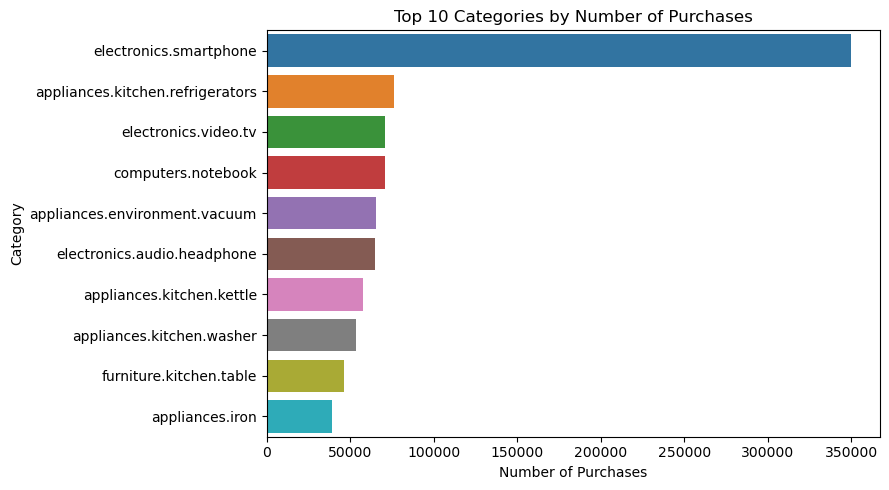

In [55]:
# Top 10 Categories
plt.figure(figsize=(9,5))
# sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index)
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index)

plt.title('Top 10 Categories by Number of Purchases')
plt.xticks(rotation=0)
plt.xlabel('Number of Purchases')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

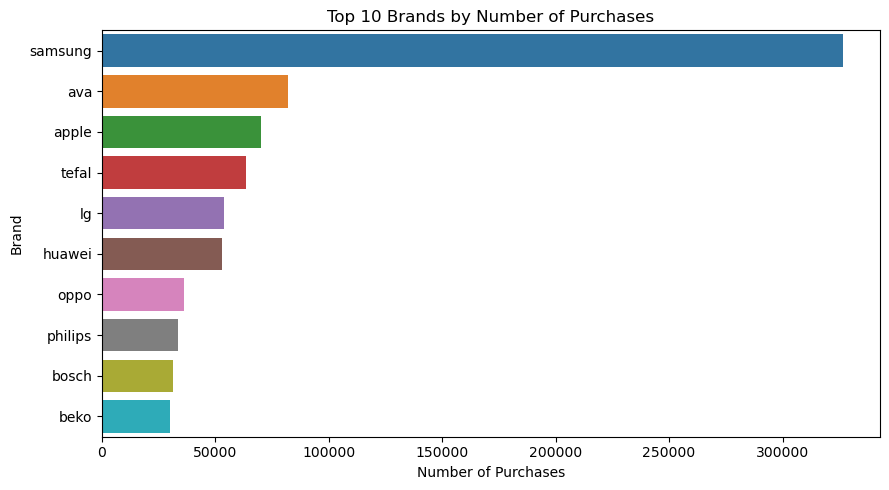

In [57]:
# Top 10 Brands
plt.figure(figsize=(9,5))
# sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index)
sns.barplot(x=top_brands.values, y=top_brands.index, hue=top_brands.index)
plt.title('Top 10 Brands by Number of Purchases')
plt.xticks(rotation=0)
plt.xlabel('Number of Purchases')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

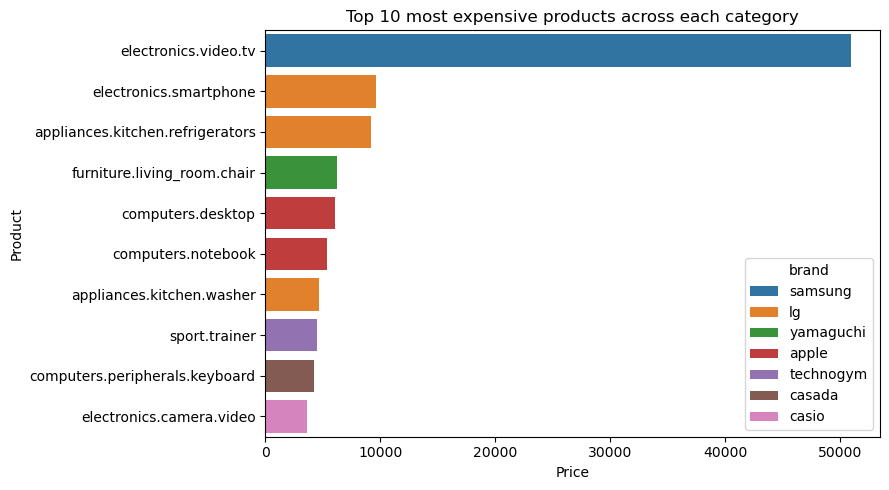

In [59]:
# Most Expensive Products
plt.figure(figsize=(9,5))
# sns.barplot(x=most_expensive['category_code'], y=most_expensive['price'], hue=most_expensive['brand'])
sns.barplot(x=most_expensive['price'], y=most_expensive['category_code'], hue=most_expensive['brand'])

plt.title('Top 10 most expensive products across each category')
plt.xticks(rotation=0)
plt.xlabel('Price')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

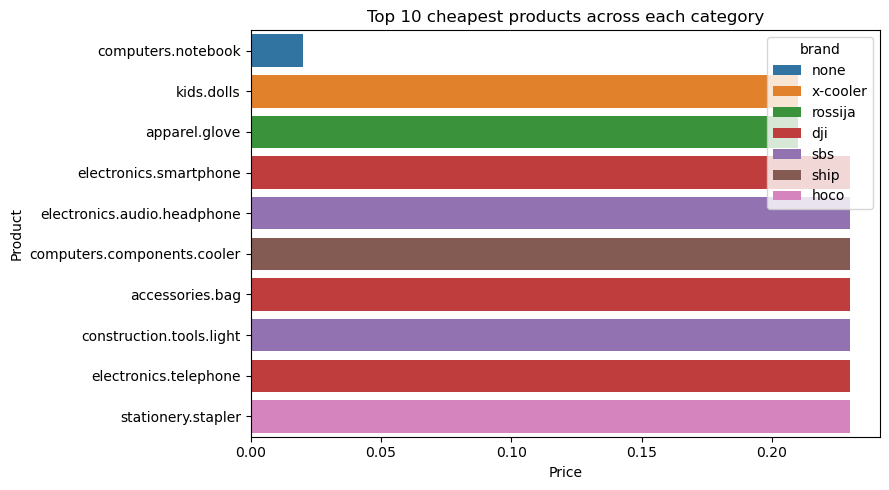

In [61]:
# Cheapest Products
plt.figure(figsize=(9,5))
# sns.barplot(x=cheapest_products['category_code'], y=cheapest_products['price'], hue=cheapest_products['brand'])
sns.barplot(x=cheapest_products['price'], y=cheapest_products['category_code'], hue=cheapest_products['brand'])

plt.title('Top 10 cheapest products across each category')
plt.xticks(rotation=0)
plt.xlabel('Price')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [65]:
ecom_df_cleaned.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,4,24,2020
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,4,24,2020
2,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,4,26,2020
3,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,4,26,2020
4,2020-04-26 14:55:26+00:00,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,4,26,2020


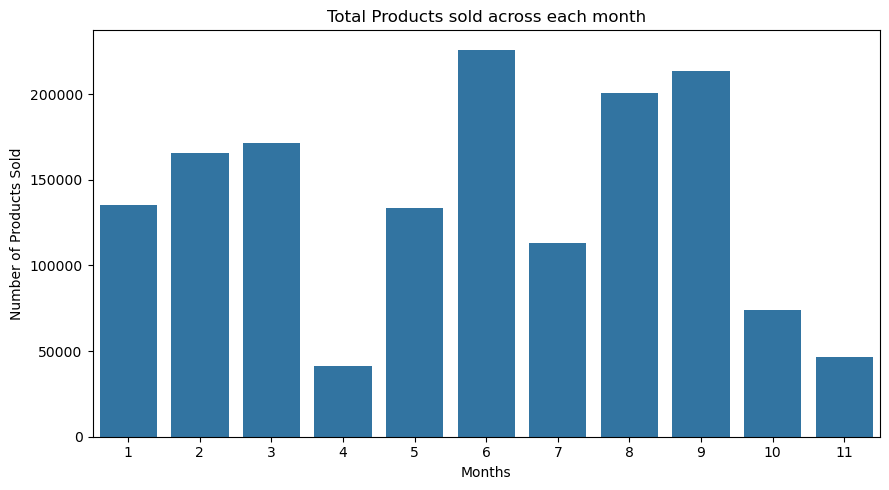

In [77]:
plt.figure(figsize=(9,5))
sns.countplot(x='month', data=ecom_df_cleaned)
plt.title('Total Products sold across each month')
plt.xticks(rotation=0)
plt.xlabel('Months')
plt.ylabel('Number of Products Sold')
plt.tight_layout()
plt.show()

# Clustering

### Kmeans Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ecom_df_cleaned = pd.read_csv('purchase_data_cleaned2.csv')

In [4]:
ecom_df_cleaned.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,month,day,year
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,4,24,2020
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,4,24,2020
2,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,4,26,2020
3,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,4,26,2020
4,2020-04-26 14:55:26+00:00,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,4,26,2020


In [5]:
ecom_df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1521419.0,2.362576e+18,1.745477e+16,2.294360e+18,2.348815e+18,2.353264e+18,2.383856e+18,2.388441e+18
product_id,1521419.0,1.676797e+18,3.127019e+17,1.515966e+18,1.515966e+18,1.515966e+18,1.515966e+18,2.388434e+18
category_id,1521419.0,2.275808e+18,2.705632e+16,2.268105e+18,2.268105e+18,2.268105e+18,2.268105e+18,2.374499e+18
price,1521419.0,1.962994e+02,2.629316e+02,0.000000e+00,2.914000e+01,1.154900e+02,2.569200e+02,5.092590e+04
month,1521419.0,5.744970e+00,2.918679e+00,1.000000e+00,3.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01
day,1521419.0,1.560595e+01,8.714624e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
year,1521419.0,2.020000e+03,0.000000e+00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03


In [4]:
# dropping the event_time column because we've already extracted the mo|nth, year and day from it. 
ecom_df_cleaned = ecom_df_cleaned.drop(['event_time'], axis=1)

In [5]:
ecom_df_cleaned.head()

,order_id,product_id,category_id,category_code,brand,price,month,day,year
0,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,4,24,2020
1,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,4,24,2020
2,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,4,26,2020
3,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,4,26,2020
4,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,4,26,2020


In [6]:
# converting categorical columns into numerical. We can also drop category_id column since the id's are duplicated and seem odd
ecom_df_cleaned = ecom_df_cleaned.drop(['category_id'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_category = LabelEncoder()
label_encoder_brand = LabelEncoder()

# Apply Label Encoding
ecom_df_cleaned['category_code'] = label_encoder_category.fit_transform(ecom_df_cleaned['category_code'])
ecom_df_cleaned['brand'] = label_encoder_brand.fit_transform(ecom_df_cleaned['brand'])



In [8]:
ecom_df_cleaned.head()

,order_id,product_id,category_code,brand,price,month,day,year
0,2294359932054536986,1515966223509089906,89,458,162.01,4,24,2020
1,2294444024058086220,2273948319057183658,81,243,77.52,4,24,2020
2,2295716521449619559,1515966223509261697,99,323,39.33,4,26,2020
3,2295740594749702229,1515966223509104892,88,32,1387.01,4,26,2020
4,2295902490203259134,2273948311742316796,30,311,462.94,4,26,2020


In [9]:
ecom_df_cleaned = ecom_df_cleaned[ecom_df_cleaned['price'] > 0]

In [12]:
X = ecom_df_cleaned

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [15]:
scaled_X_df = pd.DataFrame(data=scaled_X, columns=X.columns)

In [16]:
scaled_X_df.head()

,order_id,product_id,category_code,brand,price,month,day,year
0,-3.908141,-0.514326,0.910582,0.802938,-0.130424,-0.597876,0.963213,0.0
1,-3.903323,1.909656,0.667268,-0.446382,-0.451761,-0.597876,0.963213,0.0
2,-3.830421,-0.514326,1.214726,0.018481,-0.597007,-0.597876,1.192712,0.0
3,-3.829041,-0.514326,0.880168,-1.672458,4.528568,-0.597876,1.192712,0.0
4,-3.819766,1.909656,-0.883862,-0.051248,1.014091,-0.597876,1.192712,0.0


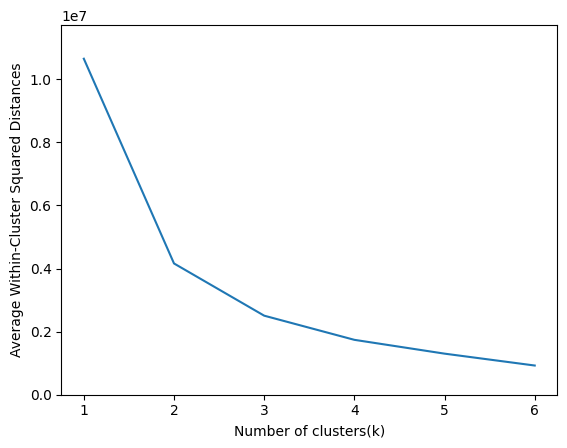

In [17]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_X_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [18]:
model = KMeans(n_clusters=3, random_state=33)

In [19]:
cluster_labels = model.fit_predict(scaled_X)

In [20]:
X['Cluster'] = cluster_labels

In [21]:
X.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
0,2294359932054536986,1515966223509089906,89,458,162.01,4,24,2020,0
1,2294444024058086220,2273948319057183658,81,243,77.52,4,24,2020,0
2,2295716521449619559,1515966223509261697,99,323,39.33,4,26,2020,0
3,2295740594749702229,1515966223509104892,88,32,1387.01,4,26,2020,0
4,2295902490203259134,2273948311742316796,30,311,462.94,4,26,2020,1


In [22]:
X.corr()['Cluster'].sort_values(ascending=False)

Cluster          1.000000
order_id         0.821062
month            0.725519
price            0.069560
product_id       0.041061
day              0.019474
brand           -0.078107
category_code   -0.342336
year                  NaN
Name: Cluster, dtype: float64

In [23]:
# Decode Features After Clustering
X['category_code'] = label_encoder_category.inverse_transform(X['category_code'])
X['brand'] = label_encoder_brand.inverse_transform(X['brand'])

In [24]:
X.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020,0
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020,0
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020,0
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020,0
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020,1


In [25]:
cluster_summary = X.groupby('Cluster').agg({
    'price': ['count', 'mean', 'min', 'max'],  # Summary stats for price
    'category_code': lambda x: x.value_counts().head(5).to_dict(),  # Distribution of categories
    'brand': lambda x: x.value_counts().head(5).to_dict()  # Distribution of brands
}).reset_index()

cluster_summary.columns = ['Cluster', 'Total Products', 'Average Price', 'Min Price', 'Max Price', 
                           'Category Distribution', 'Brand Distribution']

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Total Products  Average Price  Min Price  Max Price  \
0        0          509771     188.905162       0.02    9606.48   
1        1          475904     163.691215       0.21    2847.20   
2        2          535719     232.311985       0.21   50925.90   

                               Category Distribution  \
0  {'electronics.smartphone': 221938, 'electronic...   
1  {'appliances.kitchen.refrigerators': 50023, 'a...   
2  {'electronics.smartphone': 127661, 'computers....   

                                  Brand Distribution  
0  {'samsung': 147768, 'huawei': 40680, 'apple': ...  
1  {'samsung': 57889, 'ava': 48244, 'tefal': 2605...  
2  {'samsung': 120982, 'apple': 34900, 'ava': 249...  


In [26]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Category Distribution'])
    print('\n')

{'electronics.smartphone': 221938, 'electronics.video.tv': 48077, 'electronics.audio.headphone': 41840, 'furniture.kitchen.table': 31889, 'computers.notebook': 17739}


{'appliances.kitchen.refrigerators': 50023, 'appliances.environment.vacuum': 44103, 'appliances.kitchen.kettle': 38138, 'appliances.kitchen.washer': 34549, 'appliances.environment.air_conditioner': 26313}


{'electronics.smartphone': 127661, 'computers.notebook': 33097, 'appliances.kitchen.refrigerators': 26345, 'electronics.video.tv': 22900, 'electronics.audio.headphone': 22878}




In [27]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Brand Distribution'])
    print('\n')

{'samsung': 147768, 'huawei': 40680, 'apple': 32399, 'oppo': 23801, 'tefal': 15477}


{'samsung': 57889, 'ava': 48244, 'tefal': 26053, 'beko': 24927, 'lg': 20548}


{'samsung': 120982, 'apple': 34900, 'ava': 24946, 'tefal': 21844, 'lg': 20441}




In [28]:
ecom_df_cleaned.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020,0
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020,0
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020,0
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020,0
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020,1


### Hierarchial Clustering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
ecom_df_cleaned = pd.read_csv('purchase_data_cleaned2.csv')

# dropping the event_time column because we've already extracted the month, year and day from it. 
ecom_df_cleaned = ecom_df_cleaned.drop(['event_time'], axis=1)

# converting categorical columns into numerical. We can also drop category_id column since the id's are duplicated and seem odd
ecom_df_cleaned = ecom_df_cleaned.drop(['category_id'], axis=1)

ecom_df_cleaned = ecom_df_cleaned[ecom_df_cleaned['price'] > 0]

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_category = LabelEncoder()
label_encoder_brand = LabelEncoder()

# Apply Label Encoding
ecom_df_cleaned['category_code'] = label_encoder_category.fit_transform(ecom_df_cleaned['category_code'])
ecom_df_cleaned['brand'] = label_encoder_brand.fit_transform(ecom_df_cleaned['brand'])


In [13]:
ecom_df_cleaned.head()

,order_id,product_id,category_code,brand,price,month,day,year
0,2294359932054536986,1515966223509089906,89,458,162.01,4,24,2020
1,2294444024058086220,2273948319057183658,81,243,77.52,4,24,2020
2,2295716521449619559,1515966223509261697,99,323,39.33,4,26,2020
3,2295740594749702229,1515966223509104892,88,32,1387.01,4,26,2020
4,2295902490203259134,2273948311742316796,30,311,462.94,4,26,2020


In [12]:
X2 = ecom_df_cleaned.copy()

In [94]:
scaler = StandardScaler()
X2_norm = scaler.fit_transform(X2)
X2_norm_df = pd.DataFrame(data=X2_norm, columns=X2.columns)

In [95]:
X2_norm_df.head()

,order_id,product_id,category_code,brand,price,month,day,year
0,-3.908141,-0.514326,0.910582,0.802938,-0.130424,-0.597876,0.963213,0.0
1,-3.903323,1.909656,0.667268,-0.446382,-0.451761,-0.597876,0.963213,0.0
2,-3.830421,-0.514326,1.214726,0.018481,-0.597007,-0.597876,1.192712,0.0
3,-3.829041,-0.514326,0.880168,-1.672458,4.528568,-0.597876,1.192712,0.0
4,-3.819766,1.909656,-0.883862,-0.051248,1.014091,-0.597876,1.192712,0.0


In [96]:
sampled_data = X2_norm_df.sample(n=10000, random_state=33)

In [97]:
Z = linkage(sampled_data, method='complete')

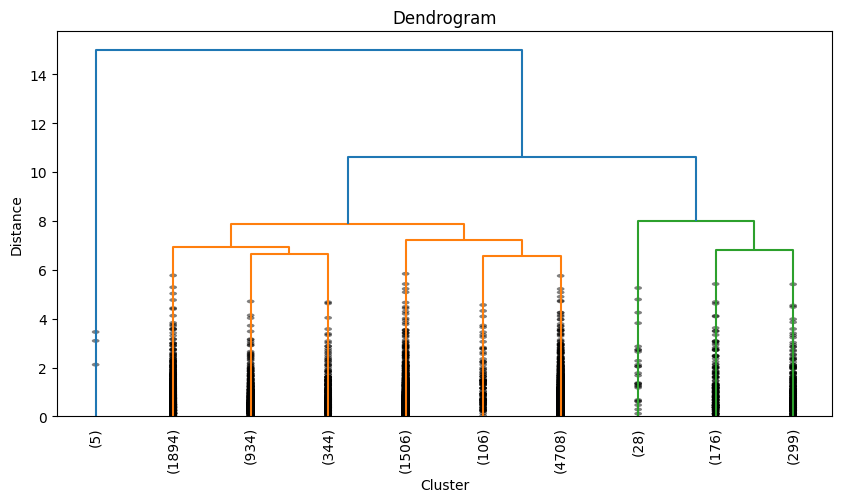

In [98]:
plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title("Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

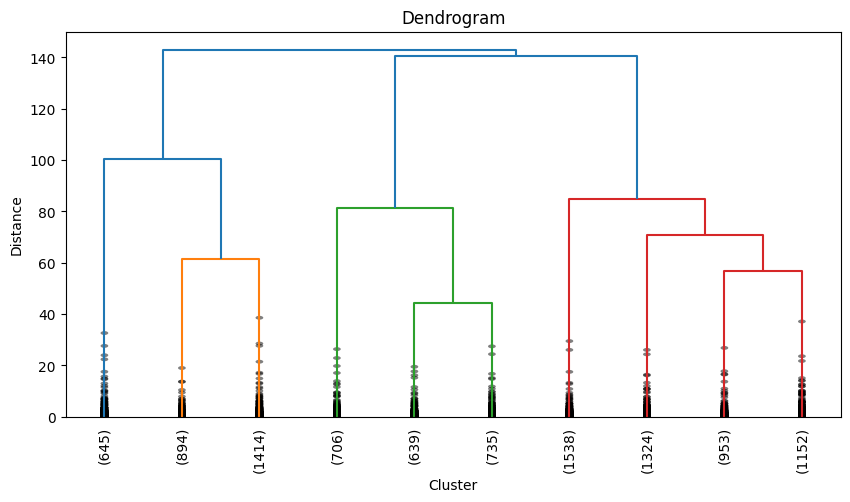

In [99]:
Z = linkage(sampled_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title("Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

We can see 2 major groups of clusters being formed when linkage is complete and 3 major clusters when linkage is ward

In [14]:
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

In [100]:
from sklearn.cluster import Birch

birch_model = Birch(n_clusters=2)

cluster_labels = birch_model.fit_predict(X2_norm_df)

In [101]:
# Add cluster labels to the dataset
X2['Cluster'] = cluster_labels

In [102]:
X2.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
0,2294359932054536986,1515966223509089906,89,458,162.01,4,24,2020,1
1,2294444024058086220,2273948319057183658,81,243,77.52,4,24,2020,1
2,2295716521449619559,1515966223509261697,99,323,39.33,4,26,2020,1
3,2295740594749702229,1515966223509104892,88,32,1387.01,4,26,2020,1
4,2295902490203259134,2273948311742316796,30,311,462.94,4,26,2020,1


In [103]:
# Decode Features After Clustering
X2['category_code'] = label_encoder_category.inverse_transform(X2['category_code'])
X2['brand'] = label_encoder_brand.inverse_transform(X2['brand'])

In [104]:
cluster_summary = X2.groupby('Cluster').agg({
    'price': ['count', 'mean', 'min', 'max'],  # Summary stats for price
    'category_code': lambda x: x.value_counts().head(5).to_dict(),  # Distribution of categories
    'brand': lambda x: x.value_counts().head(5).to_dict()  # Distribution of brands
}).reset_index()

cluster_summary.columns = ['Cluster', 'Total Products', 'Average Price', 'Min Price', 'Max Price', 
                           'Category Distribution', 'Brand Distribution']

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Total Products  Average Price  Min Price  Max Price  \
0        0           67425     954.828323      53.22   50925.90   
1        1         1453969     161.127453       0.02    1504.61   

                               Category Distribution  \
0  {'electronics.smartphone': 31034, 'computers.n...   
1  {'electronics.smartphone': 318565, 'appliances...   

                                  Brand Distribution  
0  {'apple': 28454, 'samsung': 15841, 'asus': 585...  
1  {'samsung': 310798, 'ava': 81353, 'tefal': 633...  


In [105]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Category Distribution'])
    print('\n')

{'electronics.smartphone': 31034, 'computers.notebook': 13335, 'appliances.kitchen.refrigerators': 6833, 'electronics.video.tv': 6742, 'electronics.audio.headphone': 1776}


{'electronics.smartphone': 318565, 'appliances.kitchen.refrigerators': 69535, 'appliances.environment.vacuum': 65470, 'electronics.video.tv': 64235, 'electronics.audio.headphone': 62942}




In [106]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Brand Distribution'])
    print('\n')

{'apple': 28454, 'samsung': 15841, 'asus': 5852, 'lg': 4450, 'lenovo': 3225}


{'samsung': 310798, 'ava': 81353, 'tefal': 63373, 'huawei': 52819, 'lg': 49507}




In [17]:
X3 = ecom_df_cleaned.copy()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
scaler = StandardScaler()
X3_norm = scaler.fit_transform(X3)
X3_norm_df = pd.DataFrame(data=X3_norm, columns=X3.columns)

In [20]:
birch_model2 = Birch(n_clusters=3)

cluster_labels2 = birch_model2.fit_predict(X3_norm_df)

In [21]:
# Add cluster labels to the dataset
X3['Cluster'] = cluster_labels2

In [22]:
# Decode Features After Clustering
X3['category_code'] = label_encoder_category.inverse_transform(X3['category_code'])
X3['brand'] = label_encoder_brand.inverse_transform(X3['brand'])

In [23]:
X3.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020,1
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020,1
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020,1
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020,1
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020,1


In [24]:
cluster_summary = X3.groupby('Cluster').agg({
    'price': ['count', 'mean', 'min', 'max'],  # Summary stats for price
    'category_code': lambda x: x.value_counts().head(5).to_dict(),  # Distribution of categories
    'brand': lambda x: x.value_counts().head(5).to_dict()  # Distribution of brands
}).reset_index()

cluster_summary.columns = ['Cluster', 'Total Products', 'Average Price', 'Min Price', 'Max Price', 
                           'Category Distribution', 'Brand Distribution']

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Total Products  Average Price  Min Price  Max Price  \
0        0           67424     954.087177      53.22   11574.05   
1        1         1453969     161.127453       0.02    1504.61   
2        2               1   50925.900000   50925.90   50925.90   

                               Category Distribution  \
0  {'electronics.smartphone': 31034, 'computers.n...   
1  {'electronics.smartphone': 318565, 'appliances...   
2                        {'electronics.video.tv': 1}   

                                  Brand Distribution  
0  {'apple': 28454, 'samsung': 15840, 'asus': 585...  
1  {'samsung': 310798, 'ava': 81353, 'tefal': 633...  
2                                     {'samsung': 1}  


In [25]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Category Distribution'])
    print('\n')

{'electronics.smartphone': 31034, 'computers.notebook': 13335, 'appliances.kitchen.refrigerators': 6833, 'electronics.video.tv': 6741, 'electronics.audio.headphone': 1776}


{'electronics.smartphone': 318565, 'appliances.kitchen.refrigerators': 69535, 'appliances.environment.vacuum': 65470, 'electronics.video.tv': 64235, 'electronics.audio.headphone': 62942}


{'electronics.video.tv': 1}




In [26]:
for i in range(len(cluster_summary)):
    print(cluster_summary.iloc[i]['Brand Distribution'])
    print('\n')

{'apple': 28454, 'samsung': 15840, 'asus': 5852, 'lg': 4450, 'lenovo': 3225}


{'samsung': 310798, 'ava': 81353, 'tefal': 63373, 'huawei': 52819, 'lg': 49507}


{'samsung': 1}




In [27]:
X3[X3['price'] == 50925.90]

,order_id,product_id,category_code,brand,price,month,day,year,Cluster
614023,2353234364520727464,1515966223509105016,electronics.video.tv,samsung,50925.9,5,26,2020,2


In [28]:
cluster_summary

,Cluster,Total Products,Average Price,Min Price,Max Price,Category Distribution,Brand Distribution
0,0,67424,954.087177,53.22,11574.05,"{'electronics.smartphone': 31034, 'computers.n...","{'apple': 28454, 'samsung': 15840, 'asus': 585..."
1,1,1453969,161.127453,0.02,1504.61,"{'electronics.smartphone': 318565, 'appliances...","{'samsung': 310798, 'ava': 81353, 'tefal': 633..."
2,2,1,50925.900000,50925.90,50925.90,{'electronics.video.tv': 1},{'samsung': 1}


In [42]:
X3['item'] = X3['category_code'] + "_" + X3['brand']

In [43]:
X3.head()

,order_id,product_id,category_code,brand,price,month,day,year,Cluster,item
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020,1,electronics.tablet_samsung
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020,1,electronics.audio.headphone_huawei
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020,1,furniture.kitchen.table_maestro
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020,1,electronics.smartphone_apple
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020,1,appliances.kitchen.refrigerators_lg


In [45]:
X3.to_csv("clusters.csv", index=False)

In [28]:
# Convert Category Distribution into a long-form DataFrame
cat_rows = []
for i, row in cluster_summary.iterrows():
    cluster_id = row['Cluster']
    cat_dist = row['Category Distribution']
    for cat, count in cat_dist.items():
        cat_rows.append({'Cluster': cluster_id, 'Category': cat, 'Count': count})

cat_df = pd.DataFrame(cat_rows)

# Convert Brand Distribution into a long-form DataFrame
brand_rows = []
for i, row in cluster_summary.iterrows():
    cluster_id = row['Cluster']
    brand_dist = row['Brand Distribution']
    for brand, count in brand_dist.items():
        brand_rows.append({'Cluster': cluster_id, 'Brand': brand, 'Count': count})

brand_df = pd.DataFrame(brand_rows)

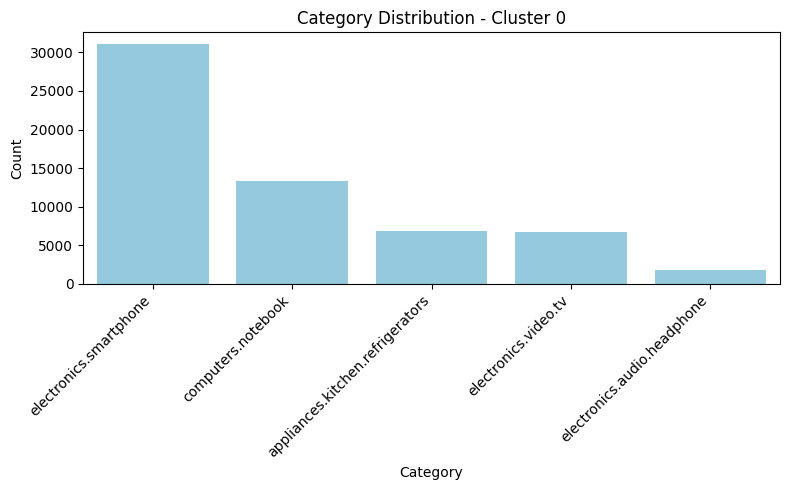

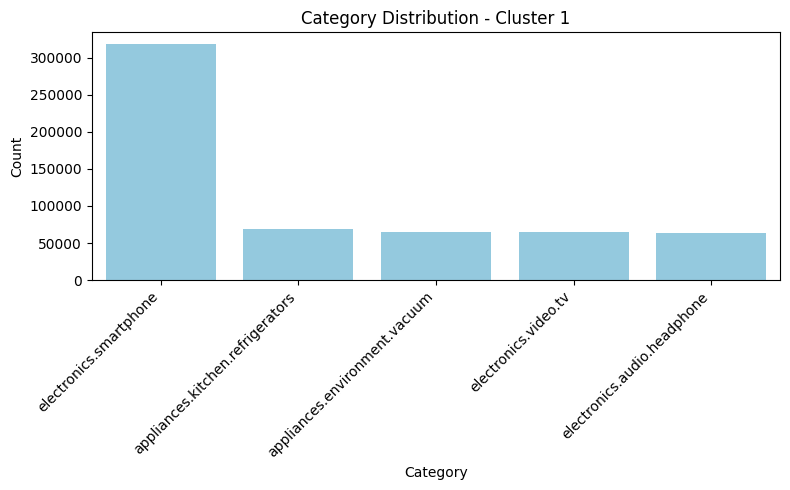

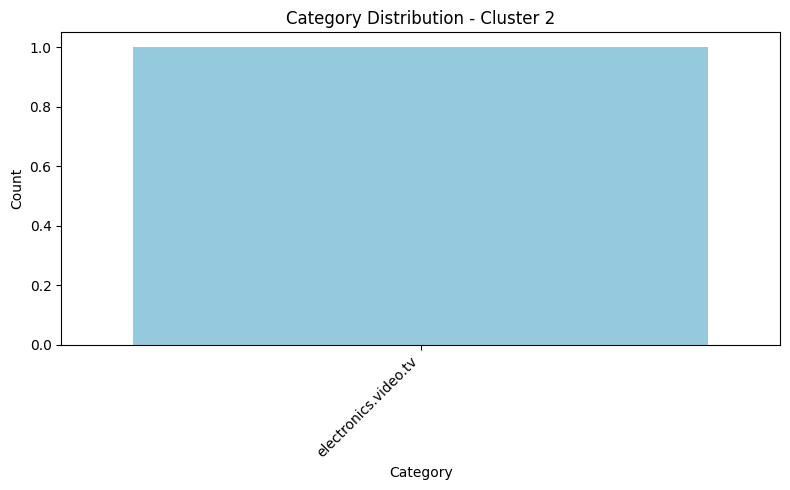

In [33]:
# Plot Category Distribution separately for each cluster
for cluster_id in cat_df['Cluster'].unique():
    cluster_data = cat_df[cat_df['Cluster'] == cluster_id].copy()
    plt.figure(figsize=(8,5))
    # Sort categories by count for a nicer plot
    cluster_data = cluster_data.sort_values('Count', ascending=False)
    sns.barplot(x='Category', y='Count', data=cluster_data, color='skyblue')
    plt.title(f'Category Distribution - Cluster {cluster_id}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

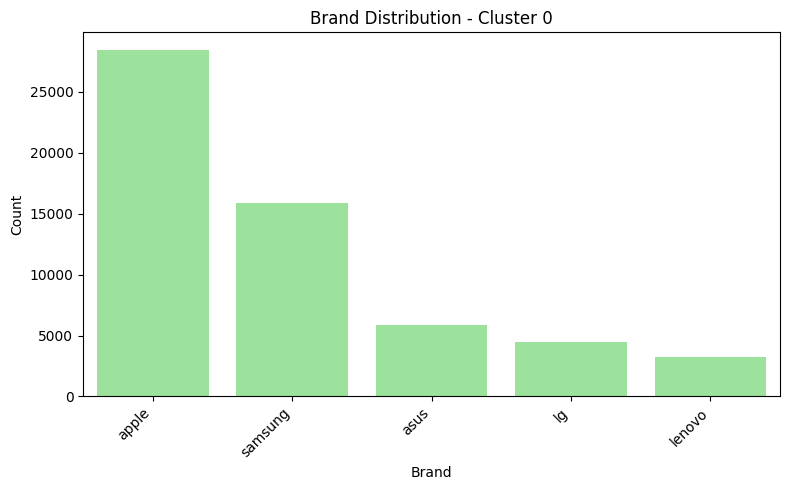

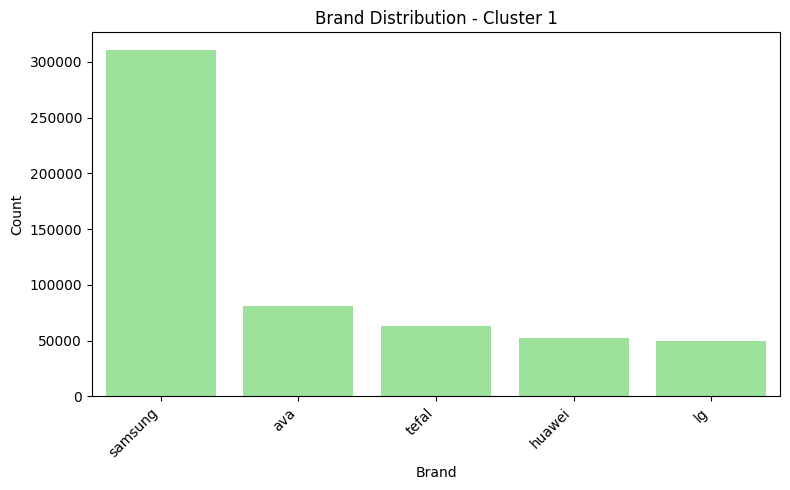

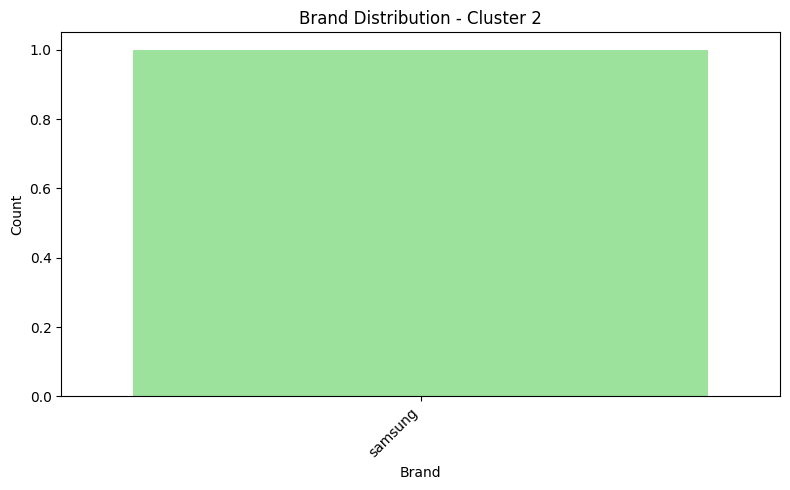

In [36]:
# Plot Brand Distribution separately for each cluster
for cluster_id in brand_df['Cluster'].unique():
    cluster_data = brand_df[brand_df['Cluster'] == cluster_id].copy()
    plt.figure(figsize=(8,5))
    # Sort brands by count for a nicer plot
    cluster_data = cluster_data.sort_values('Count', ascending=False)
    sns.barplot(x='Brand', y='Count', data=cluster_data, color='lightgreen')
    plt.title(f'Brand Distribution - Cluster {cluster_id}')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Association Rule Mining

In [33]:
# pip install apyori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
ecom_df_cleaned = pd.read_csv('purchase_data_cleaned2.csv')

# dropping the event_time column because we've already extracted the month, year and day from it. 
ecom_df_cleaned = ecom_df_cleaned.drop(['event_time'], axis=1)

# converting categorical columns into numerical. We can also drop category_id column since the id's are duplicated and seem odd
ecom_df_cleaned = ecom_df_cleaned.drop(['category_id'], axis=1)

ecom_df_cleaned = ecom_df_cleaned[ecom_df_cleaned['price'] > 0]

In [35]:
ecom_df_cleaned.head()

,order_id,product_id,category_code,brand,price,month,day,year
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020


In [36]:
ecom_df_cleaned['item'] = ecom_df_cleaned['category_code'] + "_" + ecom_df_cleaned['brand']

In [37]:
ecom_df_cleaned.head()

,order_id,product_id,category_code,brand,price,month,day,year,item
0,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,4,24,2020,electronics.tablet_samsung
1,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,4,24,2020,electronics.audio.headphone_huawei
2,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,4,26,2020,furniture.kitchen.table_maestro
3,2295740594749702229,1515966223509104892,electronics.smartphone,apple,1387.01,4,26,2020,electronics.smartphone_apple
4,2295902490203259134,2273948311742316796,appliances.kitchen.refrigerators,lg,462.94,4,26,2020,appliances.kitchen.refrigerators_lg


In [38]:
# Group by order_id and get the list of products in each order
transactions = ecom_df_cleaned.groupby('order_id')['item'].apply(list).values.tolist()

# Convert to a format suitable for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [15]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.002, use_colnames=True)

# Generate association rules (including num_itemsets argument)
# In older versions, num_itemsets is required (this can be set to the number of itemsets you're analyzing)
num_itemsets = len(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=num_itemsets)

# Print the rules
print(rules)

                             antecedents                       consequents  \
0  (electronics.audio.headphone_samsung)  (electronics.smartphone_samsung)   
1     (furniture.bedroom.pillow_dogland)    (electronics.smartphone_apple)   
2          (electronics.smartphone_awax)  (electronics.smartphone_samsung)   
3          (electronics.smartphone_awax)     (electronics.video.tv_megogo)   
4          (electronics.video.tv_megogo)     (electronics.smartphone_awax)   
5          (electronics.smartphone_awax)       (electronics.video.tv_okko)   
6            (electronics.video.tv_okko)     (electronics.smartphone_awax)   

   antecedent support  consequent support   support  confidence        lift  \
0            0.011147            0.144050  0.002327    0.208715    1.448910   
1            0.005936            0.039525  0.003301    0.556033   14.067879   
2            0.007402            0.144050  0.003828    0.517118    3.589865   
3            0.007402            0.003323  0.002744    0.37

In [18]:
frequent_itemsets

,support,itemsets
0,0.006032,(accessories.bag_transcend)
1,0.002936,(apparel.glove_sony)
2,0.009363,(appliances.environment.air_conditioner_ava)
3,0.011950,(appliances.environment.air_conditioner_beko)
4,0.005032,(appliances.environment.air_heater_ava)
...,...,...
140,0.002327,"(electronics.smartphone_samsung, electronics.a..."
141,0.003301,"(furniture.bedroom.pillow_dogland, electronics..."
142,0.003828,"(electronics.smartphone_samsung, electronics.s..."
143,0.002744,"(electronics.smartphone_awax, electronics.vide..."


In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(electronics.audio.headphone_samsung),(electronics.smartphone_samsung),0.011147,0.144050,0.002327,0.208715,1.448910,1.0,0.000721,1.081722,0.313319,0.015219,0.075548,0.112433
1,(furniture.bedroom.pillow_dogland),(electronics.smartphone_apple),0.005936,0.039525,0.003301,0.556033,14.067879,1.0,0.003066,2.163394,0.934463,0.078286,0.537763,0.319770
2,(electronics.smartphone_awax),(electronics.smartphone_samsung),0.007402,0.144050,0.003828,0.517118,3.589865,1.0,0.002761,1.772589,0.726818,0.025928,0.435853,0.271845
3,(electronics.smartphone_awax),(electronics.video.tv_megogo),0.007402,0.003323,0.002744,0.370780,111.594323,1.0,0.002720,1.583988,0.998429,0.343919,0.368682,0.598393
4,(electronics.video.tv_megogo),(electronics.smartphone_awax),0.003323,0.007402,0.002744,0.826006,111.594323,1.0,0.002720,5.704795,0.994343,0.343919,0.824709,0.598393
5,(electronics.smartphone_awax),(electronics.video.tv_okko),0.007402,0.002776,0.002258,0.305040,109.879329,1.0,0.002237,1.434938,0.998288,0.285079,0.303106,0.559176
6,(electronics.video.tv_okko),(electronics.smartphone_awax),0.002776,0.007402,0.002258,0.813312,109.879329,1.0,0.002237,5.316888,0.993658,0.285079,0.811920,0.559176


In [14]:
def recommend_items(rules, input_items, top_n=5):
    recommendations = []

    for item in input_items:
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]
        relevant_rules = relevant_rules.sort_values(by='confidence', ascending=False)
        
        for consequent in relevant_rules['consequents'].head(top_n):
            recommendations.extend(list(consequent))
    
    return list(set(recommendations))


In [23]:
# Example recommendation
input_items = ['electronics.smartphone_awax']
recommended_items = recommend_items(rules, input_items, top_n=3)
print("Recommended items:", recommended_items)

Recommended items: ['electronics.smartphone_samsung', 'electronics.video.tv_megogo', 'electronics.video.tv_okko']


In [39]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_trans, min_support=0.002, use_colnames=True)

# Generate association rules (including num_itemsets argument)
# In older versions, num_itemsets is required (this can be set to the number of itemsets you're analyzing)
num_itemsets = len(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1, num_itemsets=num_itemsets)

# Print the rules
print(rules)

                             antecedents  \
0  (electronics.audio.headphone_samsung)   
1       (electronics.smartphone_samsung)   
2     (furniture.bedroom.pillow_dogland)   
3         (electronics.smartphone_apple)   
4       (electronics.smartphone_samsung)   
5          (electronics.smartphone_awax)   
6          (electronics.video.tv_megogo)   
7          (electronics.smartphone_awax)   
8            (electronics.video.tv_okko)   
9          (electronics.smartphone_awax)   

                             consequents  antecedent support  \
0       (electronics.smartphone_samsung)            0.011147   
1  (electronics.audio.headphone_samsung)            0.144049   
2         (electronics.smartphone_apple)            0.005936   
3     (furniture.bedroom.pillow_dogland)            0.039526   
4          (electronics.smartphone_awax)            0.144049   
5       (electronics.smartphone_samsung)            0.007402   
6          (electronics.smartphone_awax)            0.003323   
7  

In [40]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(electronics.audio.headphone_samsung),(electronics.smartphone_samsung),0.011147,0.144049,0.002327,0.208715,1.448913,1.0,0.000721,1.081722,0.313320,0.015219,0.075548,0.112433
1,(electronics.smartphone_samsung),(electronics.audio.headphone_samsung),0.144049,0.011147,0.002327,0.016151,1.448913,1.0,0.000721,1.005086,0.361969,0.015219,0.005060,0.112433
2,(furniture.bedroom.pillow_dogland),(electronics.smartphone_apple),0.005936,0.039526,0.003301,0.556033,14.067644,1.0,0.003066,2.163392,0.934462,0.078286,0.537763,0.319770
3,(electronics.smartphone_apple),(furniture.bedroom.pillow_dogland),0.039526,0.005936,0.003301,0.083506,14.067644,1.0,0.003066,1.084638,0.967142,0.078286,0.078033,0.319770
4,(electronics.smartphone_samsung),(electronics.smartphone_awax),0.144049,0.007402,0.003827,0.026566,3.589045,1.0,0.002761,1.019687,0.842776,0.025923,0.019307,0.271783
5,(electronics.smartphone_awax),(electronics.smartphone_samsung),0.007402,0.144049,0.003827,0.517000,3.589045,1.0,0.002761,1.772153,0.726754,0.025923,0.435715,0.271783
6,(electronics.video.tv_megogo),(electronics.smartphone_awax),0.003323,0.007402,0.002745,0.826006,111.592457,1.0,0.002720,5.704795,0.994343,0.343919,0.824709,0.598393
7,(electronics.smartphone_awax),(electronics.video.tv_megogo),0.007402,0.003323,0.002745,0.370780,111.592457,1.0,0.002720,1.583988,0.998429,0.343919,0.368682,0.598393
8,(electronics.video.tv_okko),(electronics.smartphone_awax),0.002776,0.007402,0.002258,0.813312,109.877492,1.0,0.002237,5.316887,0.993658,0.285079,0.811920,0.559176
9,(electronics.smartphone_awax),(electronics.video.tv_okko),0.007402,0.002776,0.002258,0.305040,109.877492,1.0,0.002237,1.434938,0.998288,0.285079,0.303106,0.559176


In [41]:
rules.to_csv("rules.csv", index=False)

In [113]:
# Example recommendation
input_items = ['electronics.smartphone_samsung']
recommended_items = recommend_items(rules, input_items, top_n=3)
print("Recommended items:", recommended_items)

Recommended items: ['electronics.smartphone_awax', 'electronics.audio.headphone_samsung']
